In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [181]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
df = pd.read_csv('/content/drive/MyDrive/MTech/Project/gurgaon_properties_cleaned.csv')

In [184]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,maa bhagwati residency,krishna colony,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4,West,relativelt new,NaN,NaN,900.0,0,0,0,0,0,2
1,flat,apna enclave,ashok vihar,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1,West,old property,NaN,NaN,650.0,0,0,0,0,0,0
2,flat,tulsiani easy in homes,sohna,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,12,NaN,new Property,NaN,NaN,595.0,0,0,0,0,0,2
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,2,NaN,under construction,NaN,NaN,1200.0,1,0,0,0,0,2
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,5,NaN,under construction,1345.0,NaN,NaN,1,0,0,0,0,2


In [185]:
df.shape

(3961, 22)

# **Price**

<Axes: xlabel='price_per_sqft'>

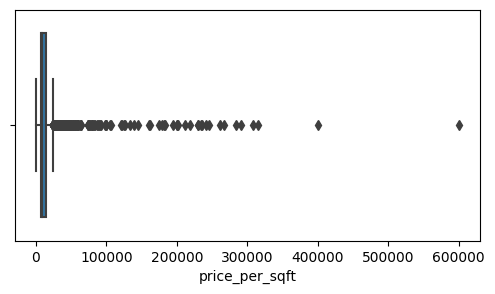

In [186]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['price_per_sqft'])

In [187]:
df = df[df['price_per_sqft'] <= 60000]

<Axes: xlabel='price_per_sqft'>

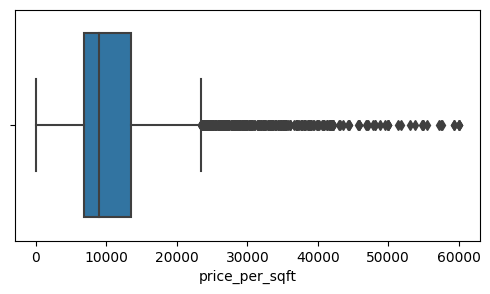

In [188]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['price_per_sqft'])

# **Area**

<Axes: xlabel='area'>

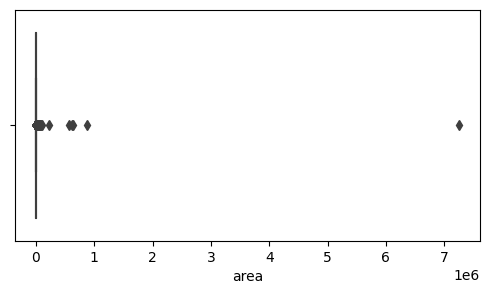

In [189]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['area'])

In [190]:
df['area'].describe()

count    3.882000e+03
mean     4.712496e+03
std      1.184748e+05
min      5.000000e+01
25%      1.215000e+03
50%      1.724500e+03
75%      2.298000e+03
max      7.250000e+06
Name: area, dtype: float64

In [191]:
df = df[df['area'] < 5000]

<Axes: xlabel='area'>

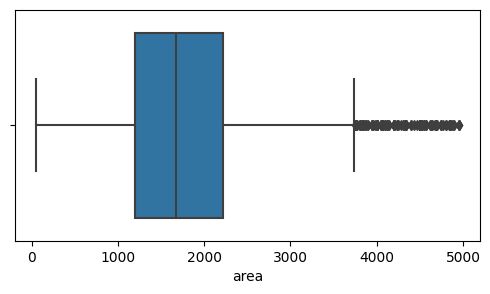

In [192]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['area'])

In [193]:
df.shape

(3771, 22)

# **super_built_up_area**

<Axes: xlabel='super_built_up_area'>

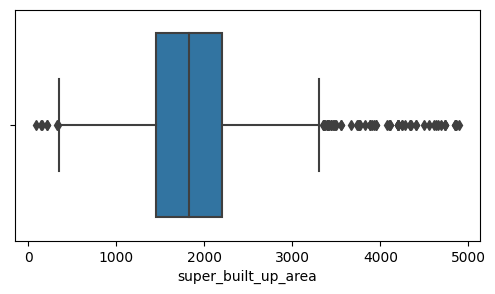

In [194]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['super_built_up_area'])

In [195]:
df[df['built_up_area']==4950.0]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
3067,house,independent,sector 4,5.00,10101.0,4950.0,Plot area 550(459.87 sq.m.),3,3,2,1.0,North-East,old property,NaN,4950.0,NaN,0,0,0,0,0,2
3324,house,independent,prem nagar,4.50,9091.0,4950.0,Plot area 550(459.87 sq.m.),4,5,2,2.0,East,old property,NaN,4950.0,NaN,0,0,0,0,0,2
3840,house,unitech uniworld resorts,sector 33,9.55,19293.0,4950.0,Plot area 550(459.87 sq.m.),6,7,3,2.0,East,relativelt new,NaN,4950.0,NaN,1,1,1,1,0,0


In [196]:
df.drop(index=[3067,3324,3840],inplace=True)

In [197]:
df.shape

(3768, 22)

# **Imputing Missing values**

In [198]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1128
agePossession             0
super_built_up_area    1844
built_up_area          2072
carpet_area            1820
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
dtype: int64

In [199]:
df[df['society'].isna()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
2758,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,No,NaN,NaN,under construction,NaN,1625.0,NaN,0,0,0,0,0,2


In [200]:
df.drop(index=[2758],inplace=True)

In [201]:
df.shape

(3767, 22)

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

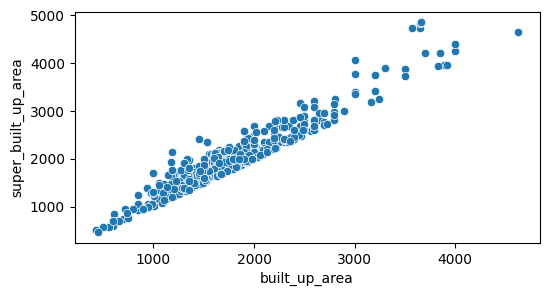

In [202]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df,x='built_up_area',y='super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

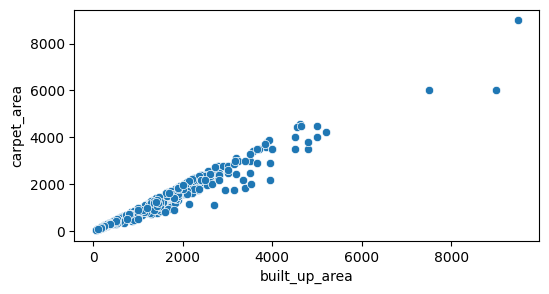

In [203]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df,x='built_up_area',y='carpet_area')

In [204]:
df.shape

(3767, 22)

<ipython-input-205-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

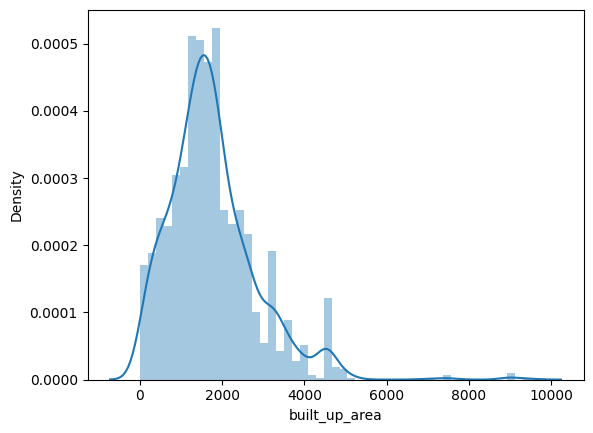

In [205]:
sns.distplot(df['built_up_area'])

In [206]:
median_built_up_area = df['built_up_area'].median()
df['built_up_area'].fillna(median_built_up_area, inplace=True)

<ipython-input-207-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

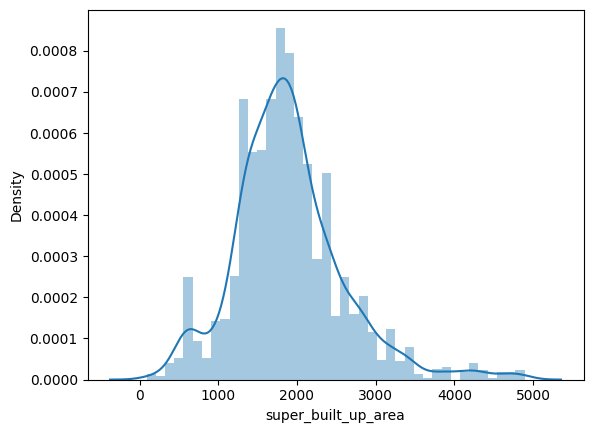

In [207]:
sns.distplot(df['super_built_up_area'])

In [208]:
mean_super_built_up_area = df['super_built_up_area'].mean()
df['super_built_up_area'].fillna(mean_super_built_up_area, inplace=True)

<ipython-input-209-becec57fa840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

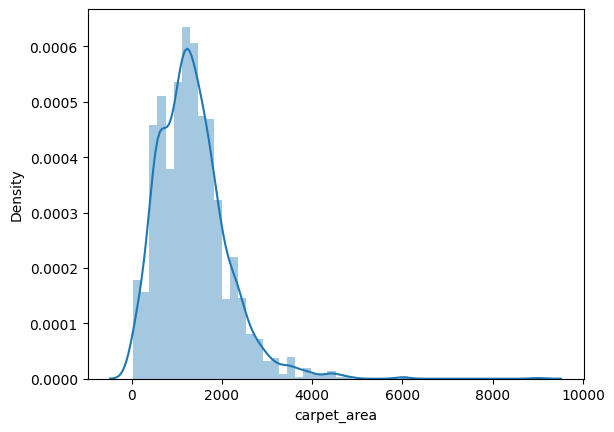

In [209]:
sns.distplot(df['carpet_area'])

In [210]:
median_carpet_area = df['carpet_area'].median()
df['carpet_area'].fillna(median_carpet_area, inplace=True)

In [211]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 18
facing                 1127
agePossession             0
super_built_up_area       0
built_up_area             0
carpet_area               0
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
dtype: int64

In [212]:
df['floorNum'].mode()

0    3.0
Name: floorNum, dtype: object

In [213]:
df['floorNum'].fillna(3.0)

0        4  
1        1  
2       12  
3        2  
4        5  
5        3  
6        5  
7       14  
8        2  
9       31  
10       1  
11       4  
12       4  
13       3  
14      13  
15      25  
16         0
17         0
19      12  
20       4  
21      11  
22       4  
23         0
24      10  
25       3  
26      20  
27       5  
28       4  
29       4  
30       1  
31      12  
32       8  
33      20  
34       8  
35      21  
36         0
37       6  
38       1  
39       1  
40      12  
41       6  
42       1  
43       2  
44       1  
45       9  
46       5  
47      18  
48      29  
49       3  
50       3  
51       5  
52       1  
53       9  
54       6  
55       2  
56      14  
57       1  
58       8  
59       2  
60      12  
61       4  
62       1  
63       7  
64       3  
65       5  
66       9  
67      14  
68      14  
69      15  
70       6  
71       6  
72       2  
73       3  
74       2  
75       4  
76       3  
77       6  

In [214]:
df.drop(columns=['area','areaWithType','facing'],inplace=True)

In [215]:
df.shape

(3767, 19)

In [216]:
df.to_csv('new_cleaned.csv',index=False)